# Regressão regularizada

As variantes da regressão linear denominadas *Ridge* e *Lasso* são duas técnicas simples para reduzir a complexidade do modelo e assim evitar o excesso de ajuste (*overfitting*).

## Ridge (L2)

A classe Ridge do Scikit-Learn implementa a regressão regularização Ridge. Essa classe possui um parâmetro denominado alfa, que corresponde ao hiperparâmetro denominado *termo de regularização*. O hiperparâmetro,
alfa permite controlar o quanto penalizamos os coeficientes. Valores altos de alfa resultam na criação de modelos mais simples. O valor ideal de alpha deve ser ajustado como qualquer outro hiperparâmetro, por meio da seleção de modelo (*model selection*). 

Na perspectiva do problema de minimização, a regularização Ridge corresponde a adicionar uma parcela à função de custo, conforme abaixo.

$$
\begin{align}
\min_{\Theta} J(\Theta) &= \min_{\Theta} || X \Theta - y||_2^2 + \alpha ||\Theta||_2^2 \\ &= \min_{\Theta} \frac{1}{2m} \left[ \sum _{i=1}^m \left (h_\theta (x^{(i)}) - y^{(i)} \right)^2 + {\alpha\sum_{j=1}^{n} \theta_j^{2}} \right]
\end{align}
$$


Para uma intuição gráfica do efeito do hiperparâmetro $alpha$, considere a figura abaixo ([fonte](https://scikit-learn.org/stable/modules/linear_model.html)). Nessa figura, cada linha corresponde ao valor de ums dos coeficientes. Repare que $\alpha$ controla a quantidade de encolhimento (*shrinkage*) aplicada aos coeficientes: quanto maior o valor de $\alpha$, maior a quantidade de encolhimento e, portanto, os coeficientes se tornam mais robustos à colinearidade.

![alt text](https://scikit-learn.org/stable/_images/sphx_glr_plot_ridge_path_0011.png)



No Scikit-Learn, a regressão linear com regularização Ridge é implementada na classe [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge). Veja o exemplo abaixo.

In [36]:
import pandas as pd
df_housing = pd.read_csv('../data/housing/housing.csv')
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [37]:
df_housing = df_housing.dropna()
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [38]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

X = df_housing.drop(columns=['median_house_value', 'ocean_proximity'])
y = df_housing.median_house_value

# Padroniza os atributos, operação importante na tarefa de regressão linear.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Ajusta o modelo de regressão linear
regr = Ridge(alpha=0.5)
model = regr.fit(X_std, y)

O próximo exemplo de código ([fonte](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html)) ilustra o efeito de usar a regularização Ridge. Nesse exemplo, 12 modelos de regressão são gerados, 6 com regressão OLS e os outros 6 com regressão regularizada (ridge). Repare que os modelos gerados no primeiro caso possuem uma variância muito maior.

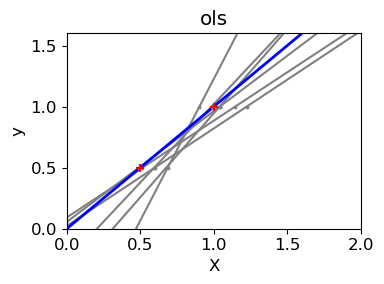

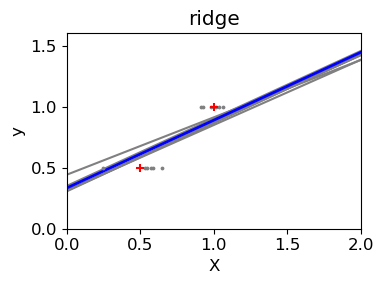

In [39]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

X_train = np.c_[.5, 1].T
y_train = [.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(ols=linear_model.LinearRegression(),
                   ridge=linear_model.Ridge(alpha=.1))

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(4, 3))

    for _ in range(6):
        this_X = .1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color='gray')
        ax.scatter(this_X, y_train, s=3, c='gray', marker='o', zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color='blue')
    ax.scatter(X_train, y_train, s=30, c='red', marker='+', zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel('X')
    ax.set_ylabel('y')

    fig.tight_layout()

plt.show()

O Scikit-Learn fornece a classe utilitária [`RidgeCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html), cujo propósito é permite realizar busca em grade (*grid search*) sobre o espaço de valores do hiperparâmetro `alpha`. Veja o exemplo a seguir.

In [40]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

X = df_housing.drop(columns=['median_house_value', 'ocean_proximity'])
y = df_housing.median_house_value

# Padrnoização dos atributos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Cria a grade de valores sobre os quais realizar a busca
regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])

# ajusta o modelo 
model_cv = regr_cv.fit(X_std, y)

# Imprime o melhor alpha encontrado na busca.
print(model_cv.alpha_)

10.0


linear regression train score: 0.6304967232684291
linear regression test score: 0.6555614582123213
ridge regression train score low alpha: 0.6304967232680143
ridge regression test score low alpha: 0.6555614611966171
ridge regression train score high alpha: 0.630457178309562
ridge regression test score high alpha: 0.6555500830173371


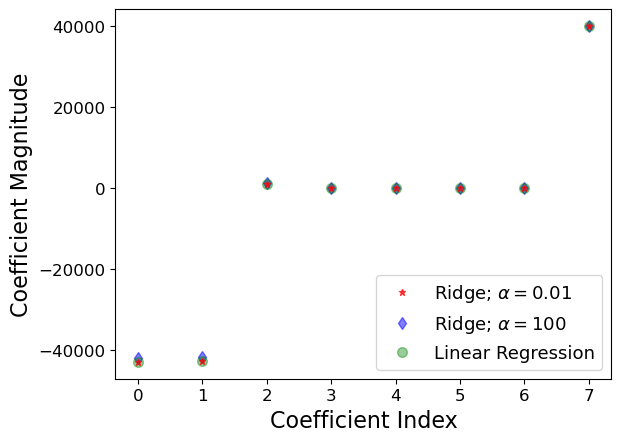

In [41]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

X = df_housing.drop(columns=['median_house_value', 'ocean_proximity'])
y = df_housing.median_house_value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

## LASSO (L1)

O LASSO (*Least Absolute Shrinkage and Selection Operator*) é um modelo linear que estima vetores de coeficientes *esparsos*. Essa variante é útil em alguns contextos devido à sua tendência de preferir soluções com menos coeficientes diferentes de zero, reduzindo efetivamente o número de atributos dos quais o modelo ajustado depende.

Do ponto de vista da otimização, a regressão regularizada Lasso procura minimizar a seguinte função durante o treinamento: 
$$
J(\theta) = \frac{1}{2m} \left[ \sum _{i=1}^m \left (h_\theta (x^{(i)}) - y^{(i)} \right)^2 + \alpha\sum_{j=1}^{n} | \theta_j | \right]
$$


training score: 0.560075681456797
test score:  0.5708015805837293
number of features used:  4


training score for alpha=0.01: 0.7083687185835189
test score for alpha =0.01:  0.6527388218791772
number of features used: for alpha = 0.01: 9
training score for alpha=0.0001: 0.7800599678662142
test score for alpha =0.0001:  0.7080831249749342
number of features used: for alpha =0.0001: 22
LR training score: 0.7886699332184939
LR test score:  0.7128420634765743


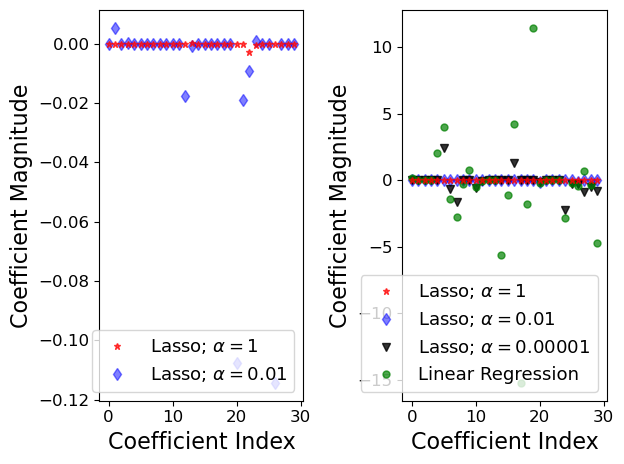

In [42]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
# difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are 
# completely neglected
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

matplotlib.rcParams.update({'font.size': 12})

cancer = load_breast_cancer()
#print cancer.keys()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
#print cancer_df.head(3)
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

print("training score:", train_score)  
print("test score: ", test_score) 
print("number of features used: ", coeff_used) 

lasso001 = Lasso(alpha = 0.01, max_iter = 10000)
lasso001.fit(X_train,y_train)
train_score001 = lasso001.score(X_train,y_train)
test_score001 = lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_ != 0)

print("training score for alpha=0.01:", train_score001) 
print("test score for alpha =0.01: ", test_score001) 
print("number of features used: for alpha = 0.01:", coeff_used001) 

lasso00001 = Lasso(alpha=0.0001, max_iter=10000)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

print("training score for alpha=0.0001:", train_score00001)  
print( "test score for alpha =0.0001: ", test_score00001)
print( "number of features used: for alpha =0.0001:", coeff_used00001)

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

print("LR training score:", lr_train_score)
print("LR test score: ", lr_test_score)

plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

O exemplo de código a seguir ([fonte](https://chrisalbon.com/machine_learning/linear_regression/effect_of_alpha_on_lasso_regression/)) ilustra o efeito de diferentes valores do parâmetro alpha sobre o modelo resultante. repare que, diferente da regularização Ridge (que tende a produzir uma vetor de coeficientes com entradas pequenas em magnitude, mas diferentes de zero), a regularização LASSO tente a produzir uma vetor de coeficientes esparso.

In [45]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import pandas as pd

X = df_housing.drop(columns=['median_house_value', 'ocean_proximity'])
names = X.columns
y = df_housing.median_house_value

scaler = StandardScaler()
X = scaler.fit_transform(X)

def run_lasso_regression(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)
        
        # Fit the lasso regression
        lasso.fit(X, y)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        
    # Return the datafram    
    return df

run_lasso_regression([.0001, .5, 10])

ValueError: Found input variables with inconsistent numbers of samples: [20433, 569]

Visto que a regressão Lasso produz modelos esparsos, ela pode ser usada para executar seleção de atributos (*feature selection*). No Scikit-Learn, isso pode ser feito em conjunto com a classe SelectFromModel, conforme o exemplo a seguir ([fonte](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-using-selectfrommodel)). Em geral, quanto maior o valor do parâmetro $\alpha$ usado, maior a quantidade de atributos removidos.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

iris = load_iris()
X, y = iris.data, iris.target
print(X.shape)

lassoreg = Lasso(alpha=0.01).fit(X, y)
model = SelectFromModel(lassoreg, prefit=True)
X_new = model.transform(X)
print(X_new.shape)

(150, 4)
(150, 3)


## Elastic-Net

O ElasticNet é um modelo de regressão linear regularizado que é treinado por meio da combinação das regularizações Ridge e Lasso. Essa combinação permite aprender um modelo esparso, em que poucos pesos são diferentes de zero como Lasso, mantendo as propriedades de regularização do Ridge. 

Matematicamente, a regularização ElasticNet procura minimizar a função de custo a seguir durante o treinamento do modelo:
$$
\min_{\Theta} { \frac{1}{2m} ||X \Theta - y||_2 ^ 2 + \alpha \rho ||\Theta||_1 +
\frac{\alpha(1-\rho)}{2} ||\Theta||_2 ^ 2}
$$

O valor do hiperparâmetro $\rho$ controla a combinação convexa.

O ElasticNet é útil quando existem vários atributos correlacionados entre si. Nessas situações, é provável que o Lasso escolha um deles aleatoriamente, enquanto a rede elástica provavelmente escolha ambos.

No Scikit-learn a classe [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) implemente esse tipo de regularização. O hiperparâmetros $\rho$ é representados pelo parâmetro `l1_ratio` (cujo valor *default* é 0.5). Veja o exemplo a seguir ([fonte](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)).


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

X, y = make_regression(n_features=2, random_state=0)
regr = ElasticNet(random_state=0)
regr.fit(X, y)  

print(regr.coef_) 
print(regr.intercept_) 
print(regr.predict([[0, 0]])) 

[18.83816048 64.55968825]
1.4512607561654032
[1.45126076]


# Referências
1. 
2. [Lasso & Ridge Regression | A Comprehensive Guide in Python & R (Updated 2024)](https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/)